1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

1. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

2. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

3. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.
 
5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).

6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten


# 1

In [2]:
v = np.random.randn(30).reshape((10,3))
zerodotfive =np.empty(10)
for i in range(10):
    zerodotfive[i]=min(v[i], key=lambda x: abs(0.5-x))
print(v,'\n', zerodotfive)

[[ 0.31339329  1.05846102 -1.18846725]
 [ 0.37687895  1.64981767 -0.19598936]
 [-1.38812916 -0.81330759 -0.62474685]
 [ 0.88198412 -1.7082409   0.56903266]
 [-0.33974005 -1.78282999  2.28616386]
 [ 0.321367    0.28287076 -0.32198576]
 [ 0.74996793 -0.52396889 -0.71392968]
 [ 0.4972084   1.80774118 -0.10296968]
 [ 0.23701028 -0.03472216 -0.1895936 ]
 [ 0.00357975 -0.16613162 -1.43676537]] 
 [ 0.31339329  0.37687895 -0.62474685  0.56903266 -0.33974005  0.321367
  0.74996793  0.4972084   0.23701028  0.00357975]


# 2

In [3]:
b = np.random.randn(36).reshape((6,6))
result =np.empty(6)
for i in range(6):
    result[i]=b[i].sum()/b[:,i].min()
print(b,'\n', result)

[[ 0.34370056 -0.20135617 -0.36577674  1.36562034 -2.25309582  0.74613866]
 [ 1.00553689 -1.2053284  -0.34277978 -0.3152635  -0.54767715 -0.48871909]
 [-0.69663525  0.76687599  0.55319097 -0.34370403  0.27266536  0.14239966]
 [ 1.56604204 -0.41616093 -0.17601881  2.39314999  0.30605212 -0.1943277 ]
 [ 0.70641097 -0.76206365 -0.52918777  0.30382292 -0.54438376  0.62096864]
 [ 1.49724891  2.61749701  2.38336486  0.3241944  -0.96746817  0.64757143]] 
 [  0.52361572   1.57154766  -1.31294172 -10.12131483   0.09073411
 -13.30500189]


# 3

In [4]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
y = np.empty((x.size - 1, 2))
for u in range(x.size - 1):
    y[u]=[x[u],x[u+1]]
e=list(filter(lambda x: x[0]==0,y))
e=np.array(e)
e[:,1].max()

5.0

# 4

In [5]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for items in i:
    x[items]+=1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


## 5

In [6]:
def assign(obs, codebook):     # Функция, определяющая для каждой точки индекс ближайшего центроида
    a=np.empty(len(obs[:,0]))
    for i in range(len(obs[:,0])):
        a[i]=np.argmin(np.sum((obs[i]-codebook)**2,axis=1)).astype(int)
    return a
               
def new_codebook(obs, codebook, a):   # Функция, определяющая новые центроиды из среднеарифметических по кластерам
    n_codebook=np.empty((len(codebook),2))
    for i in range(len(codebook)):
        n_codebook[i]=np.mean(obs[a==i], axis=0)
    return n_codebook
                    
def kmeans(obs, k_or_guess):
    if type(k_or_guess)==int :
        j=np.random.choice(len(obs[:,0]), k_or_guess, replace=False)
        while len(np.unique(obs[j],axis=0))!=len(obs[j]):  #В базе присутствуют повторяющиеся значения, которые помешают работе алгоритма
            j=np.random.choice(len(obs[:,0]), k_or_guess, replace=False)
        n_codebook=obs[j]
    elif type(k_or_guess)==ndarray :
        n_codebook=k_or_guess
    else:
        print("ERROR")
    a=assign(obs, n_codebook)
    i=0
    codebook = np.zeros((len(n_codebook),2))
    while (np.allclose(codebook, n_codebook)==0):
        a = assign(obs, n_codebook)
        codebook = n_codebook
        n_codebook = new_codebook(obs, n_codebook, a)
    distortion =0.0
    for i in range(len(obs)):
        distortion=distortion+(np.sum((obs[i]-codebook[a[i].astype(int)])**2))**0.5
    distortion=distortion/len(obs[:,0])
    return codebook, distortion
    
        
    
    

## 6

## 1) Возраст-доход

In [7]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

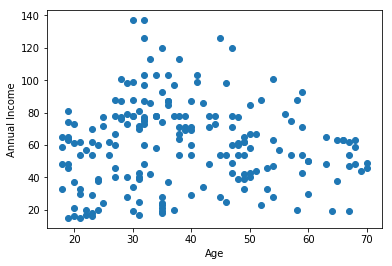

In [8]:
plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

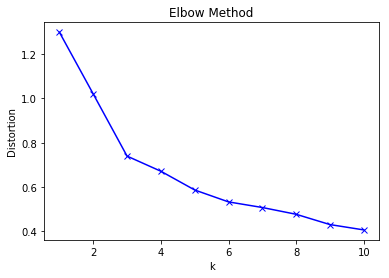

In [9]:
obs= np.column_stack((data[:, 2],data[:, 3]))
distortion=np.zeros(10)
for k in range(1,11):
    distortion[k-1]=kmeans(whiten(obs),k)[1]
plt.plot(range(1,11), distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


### Выберем k=3

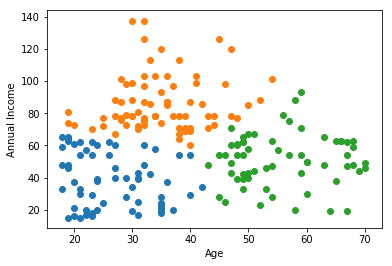

In [10]:
k=3
assignment=assign(whiten(obs), kmeans(whiten(obs),k)[0])
for i in range(k):
    plt.scatter(obs[assignment==i, 0], obs[assignment==i, 1])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

## 2)Возраст - покупательский индекс

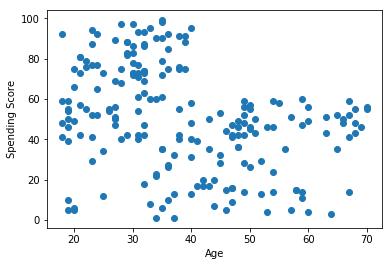

In [11]:
plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

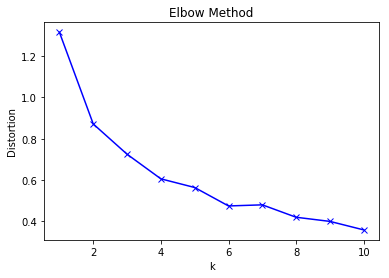

In [12]:
obs= np.column_stack((data[:, 2],data[:, 4]))
distortion=np.zeros(10)
for k in range(1,11):
    distortion[k-1]=kmeans(whiten(obs),k)[1]
plt.plot(range(1,11), distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

## Выберем k=2

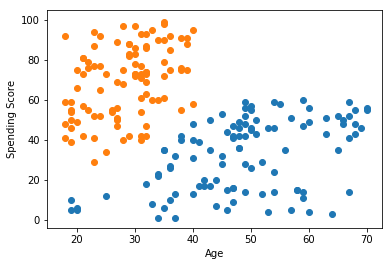

In [13]:
k=2
assignment=assign(whiten(obs), kmeans(whiten(obs),k)[0])
for i in range(k):
    plt.scatter(obs[assignment==i, 0], obs[assignment==i, 1])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

## 3)доход-покупательский индекс

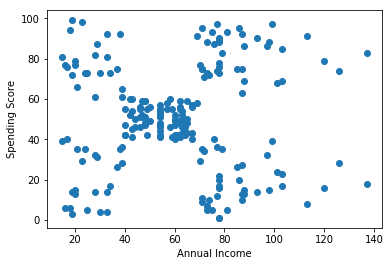

In [14]:
plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

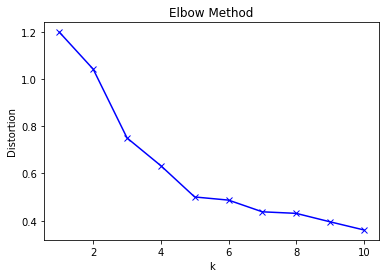

In [15]:
obs= np.column_stack((data[:, 3],data[:, 4]))
distortion=np.zeros(10)
for k in range(1,11):
    distortion[k-1]=kmeans(whiten(obs),k)[1]
plt.plot(range(1,11), distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

## Возьмём k=5

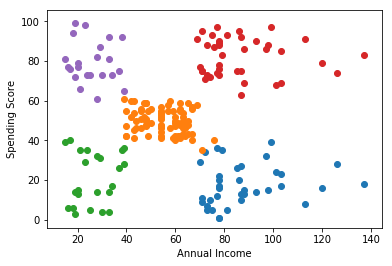

In [16]:
k=5
assignment=assign(whiten(obs), kmeans(whiten(obs),k)[0])
for i in range(k):
    plt.scatter(obs[assignment==i, 0], obs[assignment==i, 1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Data interpretation:

1) Мы можем разделить покупателей на три группы: пожилые, молодые с низким доходом и молодые с высоким доходом.

2) Молодые люди чаще ходят в супермаркет и совершают больше покупок, покупательский индекс старшего поколения меньше

3) Людей с высокой и низкой заработной платой можно разделить на две категории: тех, кто часто посещает данный супермаркет, и тех, кто редко делает в нем покупки. У покупателей со средним заработком средний покупательский индекс